In [1]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
from pathlib import Path  

In [2]:
# Load data
path1 = r'C:\Users\Usser\Documents\MASTER_ENERGIE\OCTAVE-WIND-ENERGY\Practice_1\Site1.csv'  
path2 = r'C:\Users\Usser\Documents\MASTER_ENERGIE\OCTAVE-WIND-ENERGY\Practice_1\Site2.csv'
df1 = pd.read_csv(path1, header=None, names=['wind_direction','wind_speed'])
df2 = pd.read_csv(path2, header=None, names=['wind_direction','wind_speed']) 

# 1. Estimate the wind speeds at the hub-height (80 m) 

In [3]:
from numpy import log as ln

def wind_speed_at_h_power_law (wind_speed_0, h0, h, alpha):
    wind_speed = ((h/h0)**alpha)*wind_speed_0
    return (wind_speed)

def wind_speed_at_h_logarithmic_law (wind_speed_0, h0, h, z):
    wind_speed = ((ln(h/z))/(ln(h0/z)))*wind_speed_0
    return (wind_speed)

def plot_speeds (x, a, b, site, loi_1, loi_2):
    plt.title(r'Wind speeds at the hub-height (80 m) for the ' + site )
    plt.scatter(x, a, label = loi_1)
    plt.scatter(x, b, label = loi_2)
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Corrected wind speed (m/s)')
    plt.legend()
    plt.plot()
    

# 1.0 Site 1 in different terrain types

In [58]:
# Logarithmic and Power law 
alpha = [0.10, 0.15, 0.20, 0.25, 0.30, 0.30] # Shear exponent for power law 
z = [0.0002, 0.03, 0.1, 0.4, 1.6] # Roughness length for Logarithmic law 

h0 = 20 # wind speeds at 20 m height measured 
h = 80 # hub-height (m)

df = df1
# Power law 
df['ws_80_pl_1'] = np.nan
df['ws_80_pl_2'] = np.nan
df['ws_80_pl_3'] = np.nan
df['ws_80_pl_4'] = np.nan
df['ws_80_pl_5'] = np.nan
df['ws_80_pl_6'] = np.nan

# Logarithmic law
df['ws_80_ll_1'] = np.nan
df['ws_80_ll_2'] = np.nan
df['ws_80_ll_3'] = np.nan
df['ws_80_ll_4'] = np.nan
df['ws_80_ll_5'] = np.nan

for i in range(len(df1['wind_speed'])):
    
    # Power law 
    df['ws_80_pl_1'][i] = wind_speed_at_h_power_law(df['wind_speed'][i], h0, h, alpha[0])
    df['ws_80_pl_2'][i] = wind_speed_at_h_power_law(df['wind_speed'][i], h0, h, alpha[1])
    df['ws_80_pl_3'][i] = wind_speed_at_h_power_law(df['wind_speed'][i], h0, h, alpha[2])
    df['ws_80_pl_4'][i] = wind_speed_at_h_power_law(df['wind_speed'][i], h0, h, alpha[3])
    df['ws_80_pl_5'][i] = wind_speed_at_h_power_law(df['wind_speed'][i], h0, h, alpha[4])
    df['ws_80_pl_6'][i] = wind_speed_at_h_power_law(df['wind_speed'][i], h0, h, alpha[5])
    
    # Logarithmic law
    df['ws_80_ll_1'][i] = wind_speed_at_h_logarithmic_law(df['wind_speed'][i], h0, h, z[0])
    df['ws_80_ll_2'][i] = wind_speed_at_h_logarithmic_law(df['wind_speed'][i], h0, h, z[1])
    df['ws_80_ll_3'][i] = wind_speed_at_h_logarithmic_law(df['wind_speed'][i], h0, h, z[2])
    df['ws_80_ll_4'][i] = wind_speed_at_h_logarithmic_law(df['wind_speed'][i], h0, h, z[3])
    df['ws_80_ll_5'][i] = wind_speed_at_h_logarithmic_law(df['wind_speed'][i], h0, h, z[4])

# To analyse later with Weibull dist. 
site1_ws_for_analyse = df

[]

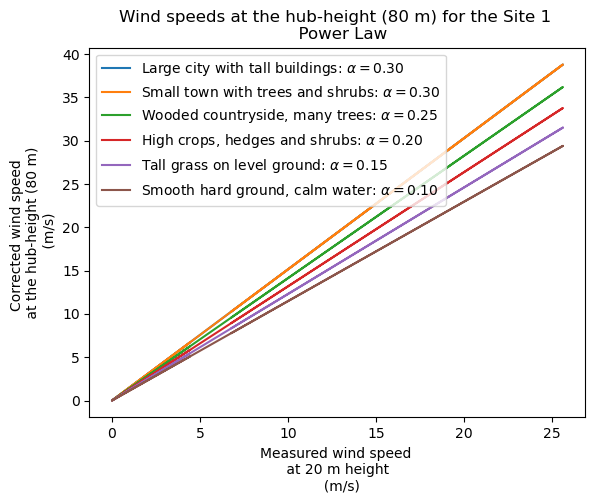

In [20]:
# Power Law graph Wind Speed Correlation 
plt.plot(df['wind_speed'], df['ws_80_pl_6'], label = r'Large city with tall buildings: $ \alpha =0.30$') 
plt.plot(df['wind_speed'], df['ws_80_pl_5'], label = r'Small town with trees and shrubs: $ \alpha =0.30$') 
plt.plot(df['wind_speed'], df['ws_80_pl_4'], label = r'Wooded countryside, many trees: $ \alpha =0.25$')
plt.plot(df['wind_speed'], df['ws_80_pl_3'], label = r'High crops, hedges and shrubs: $ \alpha =0.20$')
plt.plot(df['wind_speed'], df['ws_80_pl_2'], label = r'Tall grass on level ground: $ \alpha =0.15$')
plt.plot(df['wind_speed'], df['ws_80_pl_1'], label = r'Smooth hard ground, calm water: $ \alpha =0.10$')

plt.title('Wind speeds at the hub-height (80 m) for the Site 1 \n  Power Law')
plt.xlabel('Measured wind speed \n at 20 m height \n  (m/s)')
plt.ylabel('Corrected wind speed \n at the hub-height (80 m) \n (m/s)')
plt.legend(loc='best')
plt.plot()

[]

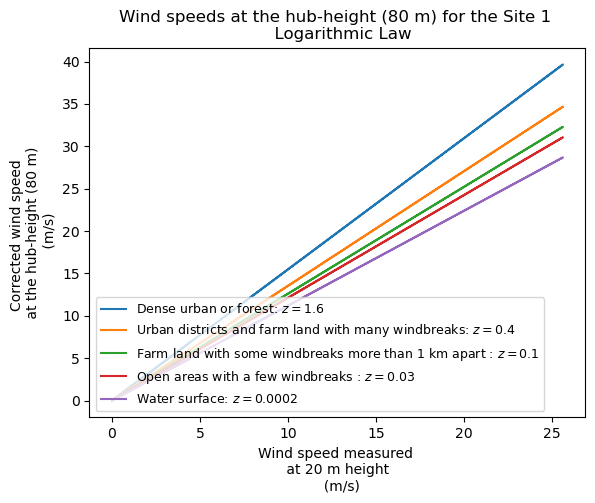

In [21]:
# Logarithmic Law graph Wind Speed Correlation 
plt.plot(df['wind_speed'], df['ws_80_ll_5'], label = r'Dense urban or forest: $ z =1.6$') 
plt.plot(df['wind_speed'], df['ws_80_ll_4'], label = r'Urban districts and farm land with many windbreaks: $ z =0.4$')
plt.plot(df['wind_speed'], df['ws_80_ll_3'], label = r'Farm land with some windbreaks more than 1 km apart : $ z =0.1$')
plt.plot(df['wind_speed'], df['ws_80_ll_2'], label = r'Open areas with a few windbreaks : $ z =0.03$')
plt.plot(df['wind_speed'], df['ws_80_ll_1'], label = r'Water surface: $ z =0.0002$')

plt.title('Wind speeds at the hub-height (80 m) for the Site 1 \n  Logarithmic Law')
plt.xlabel('Wind speed measured \n at 20 m height \n  (m/s)')
plt.ylabel('Corrected wind speed \n at the hub-height (80 m) \n (m/s)')
plt.legend(loc=3, fontsize="9")
plt.plot()

[]

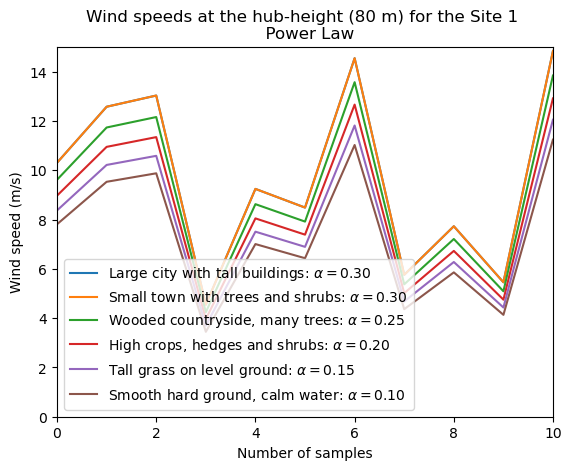

In [22]:
# Power Law Data Graph
plt.plot(range(len(df['wind_speed'])), df['ws_80_pl_6'], label = r'Large city with tall buildings: $ \alpha =0.30$') 
plt.plot(range(len(df['wind_speed'])), df['ws_80_pl_5'], label = r'Small town with trees and shrubs: $ \alpha =0.30$') 
plt.plot(range(len(df['wind_speed'])), df['ws_80_pl_4'], label = r'Wooded countryside, many trees: $ \alpha =0.25$')
plt.plot(range(len(df['wind_speed'])), df['ws_80_pl_3'], label = r'High crops, hedges and shrubs: $ \alpha =0.20$')
plt.plot(range(len(df['wind_speed'])), df['ws_80_pl_2'], label = r'Tall grass on level ground: $ \alpha =0.15$')
plt.plot(range(len(df['wind_speed'])), df['ws_80_pl_1'], label = r'Smooth hard ground, calm water: $ \alpha =0.10$')
plt.title('Wind speeds at the hub-height (80 m) for the Site 1 \n  Power Law')
plt.xlabel('Number of samples')
plt.ylabel('Wind speed (m/s)')
plt.xlim(0,10)
plt.ylim(0,15)
plt.legend(loc=3) 
plt.plot()

[]

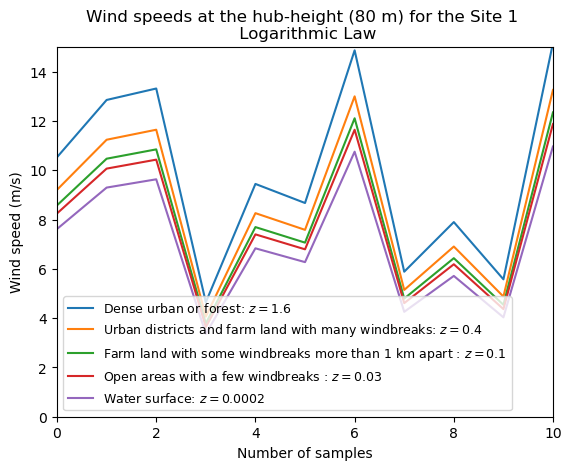

In [23]:
# Logarithmic Law Data Graph
plt.plot(range(len(df['wind_speed'])), df['ws_80_ll_5'], label = r'Dense urban or forest: $ z =1.6$') 
plt.plot(range(len(df['wind_speed'])), df['ws_80_ll_4'], label = r'Urban districts and farm land with many windbreaks: $ z =0.4$')
plt.plot(range(len(df['wind_speed'])), df['ws_80_ll_3'], label = r'Farm land with some windbreaks more than 1 km apart : $ z =0.1$')
plt.plot(range(len(df['wind_speed'])), df['ws_80_ll_2'], label = r'Open areas with a few windbreaks : $ z =0.03$')
plt.plot(range(len(df['wind_speed'])), df['ws_80_ll_1'], label = r'Water surface: $ z =0.0002$')
plt.title('Wind speeds at the hub-height (80 m) for the Site 1 \n Logarithmic Law')
plt.xlabel('Number of samples')
plt.ylabel('Wind speed (m/s)')
plt.xlim(0,10)
plt.ylim(0,15)
plt.legend(loc=3, fontsize="9") 
plt.plot()

## 1.1 Site 1, using the power law (Smooth hard ground, calm water) and logarithmic law (Water surface)

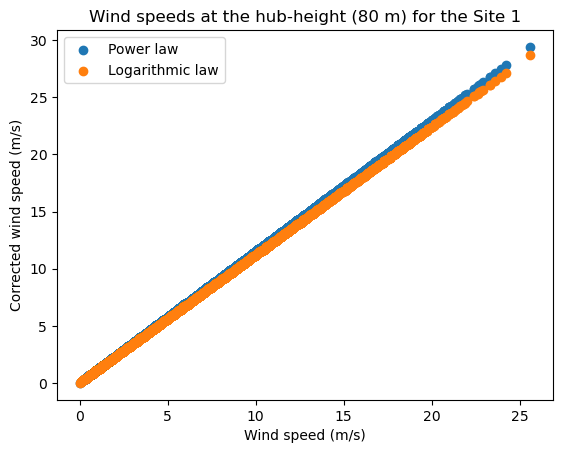

In [95]:
h0 = 20 # wind speeds at 20 m height measured 
h = 80 # hub-height (m)
alpha = 0.1 # Friction Coefficient 
z = 0.0002 # Roughness Length 

df1['wind_speed_80_power_law'] = np.nan
df1['wind_speed_80_logarithmic_law'] = np.nan

for i in range(len(df1['wind_speed'])):
    df1['wind_speed_80_power_law'][i] = wind_speed_at_h(df1['wind_speed'][i], h0, h, alpha)
    df1['wind_speed_80_logarithmic_law'][i] = wind_speed_at_h_logarithmic_law(df1['wind_speed'][i], h0, h, z)

# To analyse later with Weibull dist. 
site1_ws_for_analyse = df1

plot_speeds (df1['wind_speed'], df1['wind_speed_80_power_law'], df1['wind_speed_80_logarithmic_law'], 'Site 1', 'Power law', 'Logarithmic law')

## 1.2 Site 1, using the power law (Small town with trees and shrubs) and logarithmic law (Urban districts and farm land with many windbreaks)

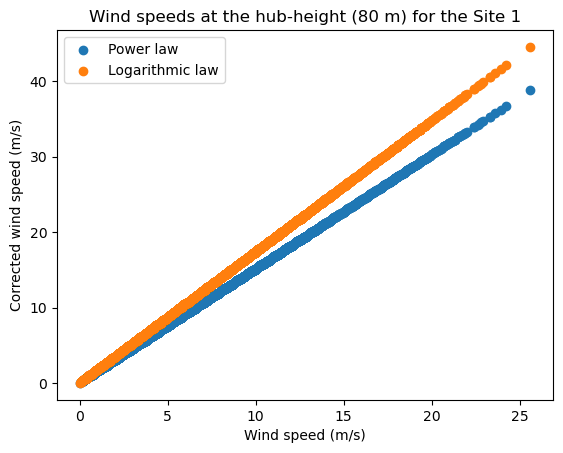

In [24]:
h0 = 20 # wind speeds at 20 m height measured 
h = 80 # hub-height (m)
alpha = 0.3 # Friction Coefficient 
z = 0.4 # Roughness Length 

df1['wind_speed_80_power_law'] = np.nan
df1['wind_speed_80_logarithmic_law'] = np.nan

for i in range(len(df1['wind_speed'])):
    df1['wind_speed_80_power_law'][i] = wind_speed_at_h(df1['wind_speed'][i], h0, h, alpha)
    df1['wind_speed_80_logarithmic_law'][i] = wind_speed_at_h(df1['wind_speed'][i], h0, h, z)

plot_speeds (df1['wind_speed'], df1['wind_speed_80_power_law'], df1['wind_speed_80_logarithmic_law'], 'Site 1', 'Power law', 'Logarithmic law')

## 1.3 Site 2, using the power law (Smooth hard ground, calm water) and logarithmic law (Water surface)

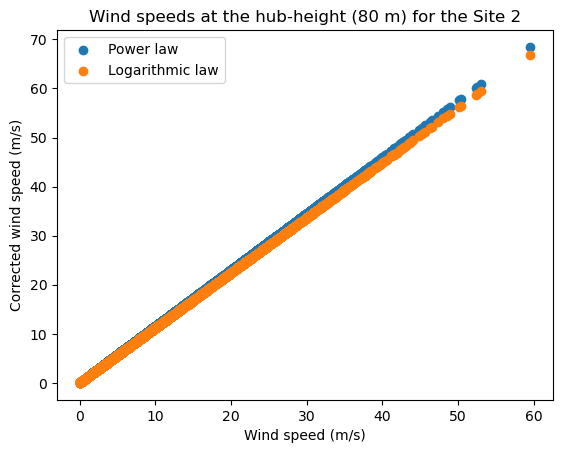

In [57]:
h0 = 20 # wind speeds at 20 m height measured 
h = 80 # hub-height (m)
alpha = 0.1 # Friction Coefficient 
z = 0.0002 # Roughness Length 

df2['wind_speed_80_power_law'] = np.nan
df2['wind_speed_80_logarithmic_law'] = np.nan

for i in range(len(df1['wind_speed'])):
    df2['wind_speed_80_power_law'][i] = wind_speed_at_h(df2['wind_speed'][i], h0, h, alpha)
    df2['wind_speed_80_logarithmic_law'][i] = wind_speed_at_h_logarithmic_law(df2['wind_speed'][i], h0, h, z)

# To analyse later with Weibull dist. 
site2_ws_for_analyse = df2

plot_speeds (df2['wind_speed'], df2['wind_speed_80_power_law'], df2['wind_speed_80_logarithmic_law'], 'Site 2', 'Power law', 'Logarithmic law')

## 1.4 Site 2, using the power law (Small town with trees and shrubs) and logarithmic law (Urban districts and farm land with many windbreaks)

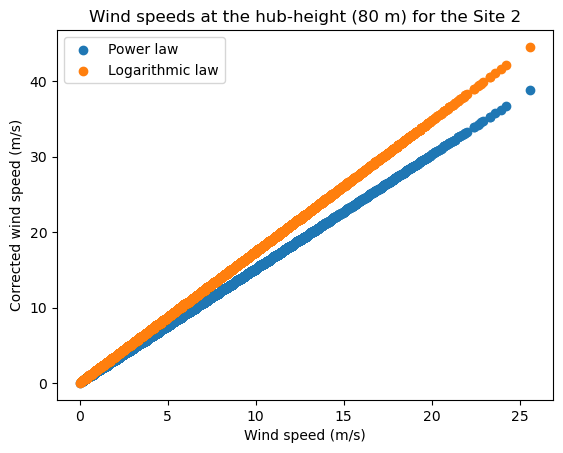

In [26]:
h0 = 20 # wind speeds at 20 m height measured 
h = 80 # hub-height (m)
alpha = 0.3 # Friction Coefficient 
z = 0.4 # Roughness Length 

df2['wind_speed_80_power_law'] = np.nan
df2['wind_speed_80_logarithmic_law'] = np.nan

for i in range(len(df1['wind_speed'])):
    df2['wind_speed_80_power_law'][i] = wind_speed_at_h(df2['wind_speed'][i], h0, h, alpha)
    df2['wind_speed_80_logarithmic_law'][i] = wind_speed_at_h_logarithmic_law(df2['wind_speed'][i], h0, h, z)

plot_speeds (df2['wind_speed'], df2['wind_speed_80_power_law'], df2['wind_speed_80_logarithmic_law'], 'Site 2', 'Power law', 'Logarithmic law')

# 2. Weibull distribution

## 2.1 Site 1

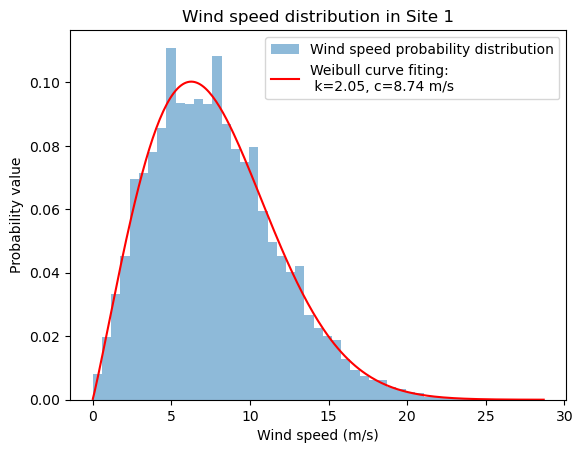

In [96]:
from scipy import stats
import matplotlib.pyplot as plt

# Only wind speed data
data = site1_ws_for_analyse['wind_speed_80_logarithmic_law'].sort_values(axis=0, ascending=True)

# Parameters of Weibull fir
k, b, c = stats.weibull_min.fit(data)  

# Plot
_ = plt.hist(data, bins=np.linspace(data.min(), data.max(), 50), density=True, alpha=0.5, label='Wind speed probability distribution');
plt.plot(data, stats.exponweib.pdf(data, *stats.exponweib.fit(data, 1, 1, scale=2, loc=0)), c='r', label='Weibull curve fiting: \n k=%1.2f, c=%1.2f m/s' %(k, c))

plt.title('Wind speed distribution in Site 1')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability value')
plt.legend()
plt.show()

## 2.1 Site 2

1.8922933931592651 -0.008048250031676309 10.124047891604894


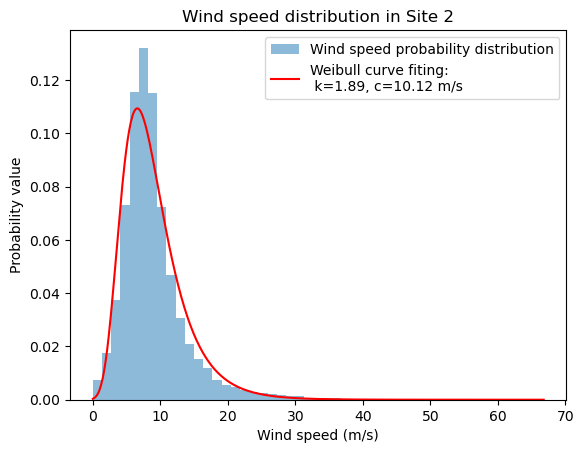

In [97]:
from scipy import stats
import matplotlib.pyplot as plt

# Only wind speed data
data = site2_ws_for_analyse['wind_speed_80_logarithmic_law'].sort_values(axis=0, ascending=True)

# Parameters of Weibull fir
k, b, c = stats.weibull_min.fit(data) 

# Plot
_ = plt.hist(data, bins=np.linspace(data.min(), data.max(), 50), density=True, alpha=0.5, label='Wind speed probability distribution');
plt.plot(data, stats.exponweib.pdf(data, *stats.exponweib.fit(data, 1, 2, scale=2, loc=0)), c='r', label='Weibull curve fiting: \n k=%1.2f, c=%1.2f m/s' %(k, c))
print(k,b,c)
plt.title('Wind speed distribution in Site 2')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability value')
plt.legend()
plt.show()

# 3. Annual Energy Production (AEP) 

In [115]:
site1_ws_for_analyse.sort_values(by='wind_speed', ascending=True)  

,power,wind_speed,wind_speed_80_power_law,wind_speed_80_logarithmic_law
18005,186.8,25.6,29.406678,28.682547
51868,144.7,24.2,27.798500,27.113970
34123,145.7,23.9,27.453891,26.777847
30750,229.3,23.6,27.109281,26.441723
2108,44.0,23.3,26.764672,26.105600
...,...,...,...,...
39014,333.8,0.1,0.114870,0.112041
35848,323.5,0.1,0.114870,0.112041
42270,344.9,0.1,0.114870,0.112041
7343,207.5,0.1,0.114870,0.112041


In [116]:
site1_ws_for_analyse.sort_values(by='wind_speed', ascending=True)  

,power,wind_speed,wind_speed_80_power_law,wind_speed_80_logarithmic_law
38170,342.2,0.0,0.000000,0.000000
2742,248.5,0.1,0.114870,0.112041
39014,333.8,0.1,0.114870,0.112041
12475,232.1,0.1,0.114870,0.112041
35848,323.5,0.1,0.114870,0.112041
...,...,...,...,...
2108,44.0,23.3,26.764672,26.105600
30750,229.3,23.6,27.109281,26.441723
34123,145.7,23.9,27.453891,26.777847
51868,144.7,24.2,27.798500,27.113970


# 3. Weibull distribution by sectors

## 3.1 Site 1 and 2

In [28]:
df_by_sector = site1_ws_for_analyse.copy()
df_by_sector


mask_0_30    = (df_by_sector['wind_direction'] >= 0 ) & (df_by_sector['wind_direction'] < 30)
mask_30_60   = (df_by_sector['wind_direction'] >= 30) & (df_by_sector['wind_direction'] < 60)
mask_60_90   = (df_by_sector['wind_direction'] >= 60) & (df_by_sector['wind_direction'] < 90)
mask_90_120  = (df_by_sector['wind_direction'] >= 90) & (df_by_sector['wind_direction'] < 120)
mask_120_150 = (df_by_sector['wind_direction'] >= 120) & (df_by_sector['wind_direction'] < 150)
mask_150_180 = (df_by_sector['wind_direction'] >= 150) & (df_by_sector['wind_direction'] < 180)
mask_180_210 = (df_by_sector['wind_direction'] >= 180) & (df_by_sector['wind_direction'] < 210)
mask_210_240 = (df_by_sector['wind_direction'] >= 210) & (df_by_sector['wind_direction'] < 240)
mask_240_270 = (df_by_sector['wind_direction'] >= 240) & (df_by_sector['wind_direction'] < 270)
mask_270_300 = (df_by_sector['wind_direction'] >= 270) & (df_by_sector['wind_direction'] < 300)
mask_300_330 = (df_by_sector['wind_direction'] >= 300) & (df_by_sector['wind_direction'] < 330)
mask_330_360 = (df_by_sector['wind_direction'] >= 330) & (df_by_sector['wind_direction'] < 360)

df_0_30    = df_by_sector[mask_0_30]
df_30_60   = df_by_sector[mask_30_60]
df_60_90   = df_by_sector[mask_60_90]
df_90_120  = df_by_sector[mask_90_120]
df_120_150 = df_by_sector[mask_120_150]
df_150_180 = df_by_sector[mask_150_180]
df_180_210 = df_by_sector[mask_180_210]
df_210_240 = df_by_sector[mask_210_240]
df_240_270 = df_by_sector[mask_240_270]
df_270_300 = df_by_sector[mask_270_300]
df_300_330 = df_by_sector[mask_300_330]
df_330_360 = df_by_sector[mask_330_360]

DATA = [df_0_30, df_30_60, df_60_90,df_90_120, df_120_150, df_150_180, df_180_210, df_210_240, df_240_270, df_270_300, df_300_330, df_330_360]


3.566936942535159 0.7833858075461828 7.065890880029676


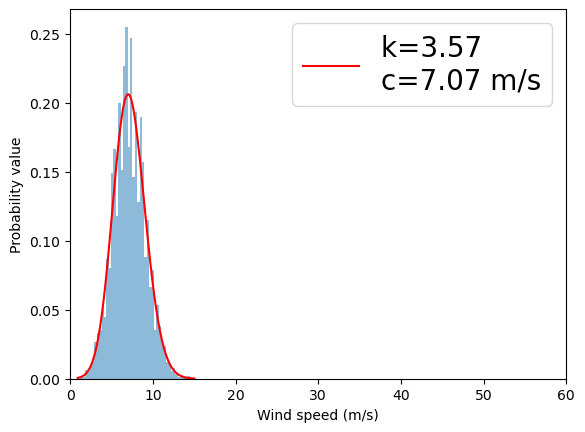

0.6935530929729843 0.4481647993062369 3.152157980428819


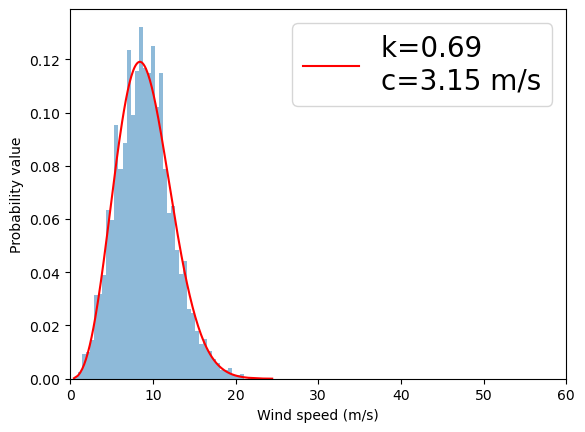

0.5721051521492413 -1.6113810882213543e-26 3.078774623340048


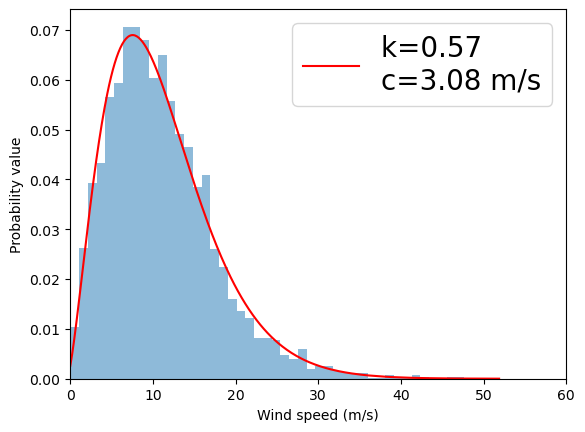

0.6197972348459311 -9.277170083955228e-27 3.5180266490525387


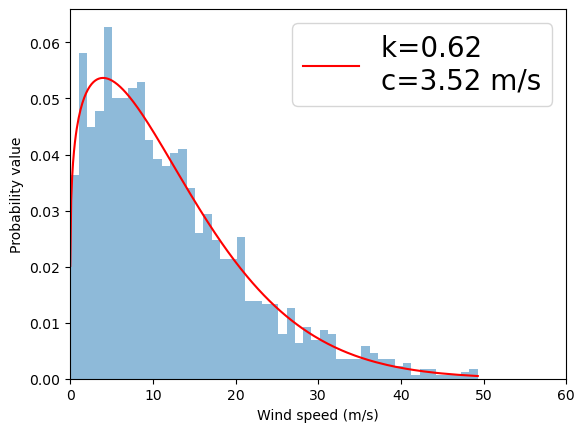

0.5699599533769644 -2.2716509674765934e-26 3.3334316528295407


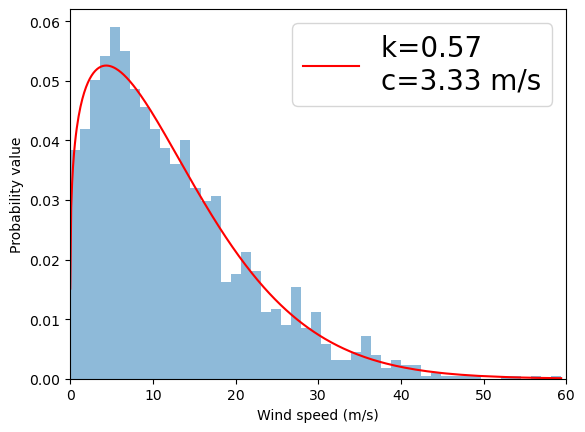

0.5854810849570664 -1.0785128952451094e-25 3.096079562673978


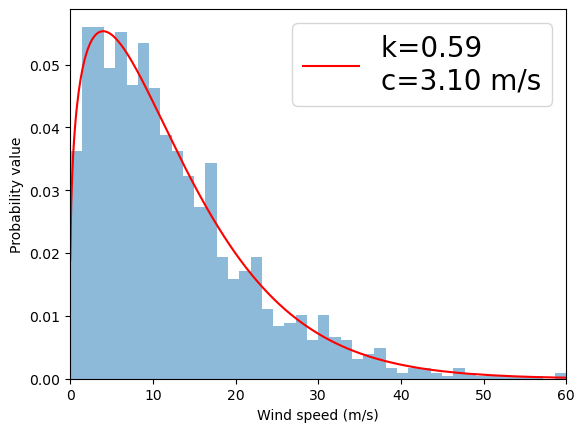

0.5796922766577608 0.11204119982655923 3.2390944857701305


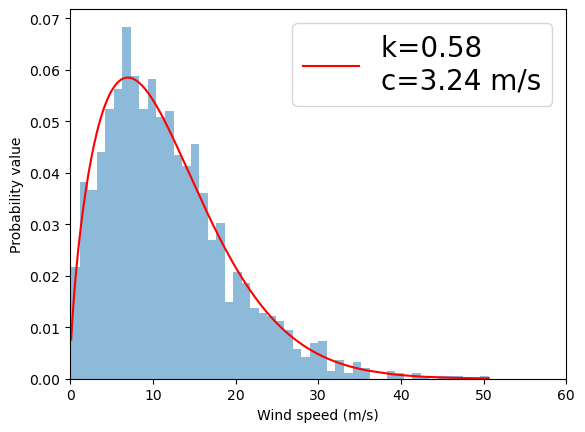

2.140119278703141 0.07475279211726116 11.704501825261282


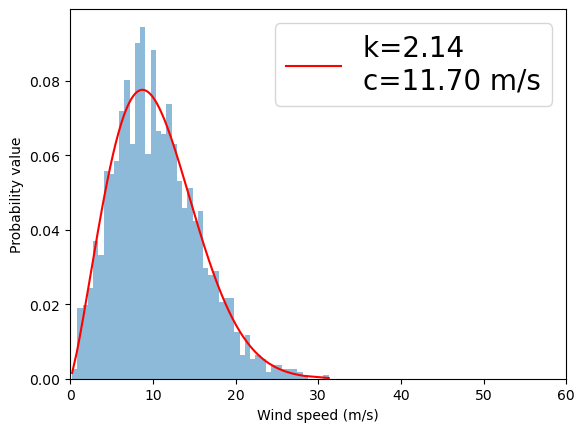

2.697300784748549 -0.003583388638735574 10.688702487919645


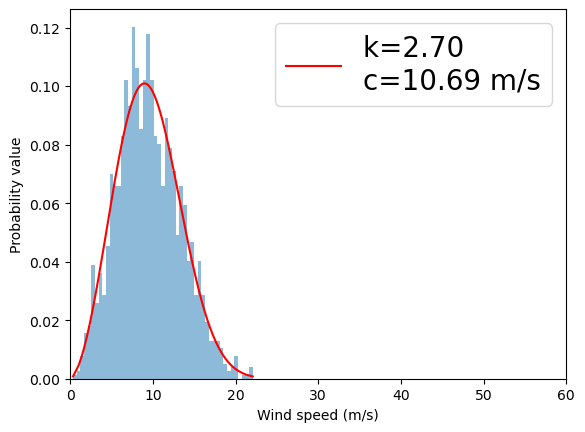

0.7079584628673743 0.3361235994796777 3.1659489210661476


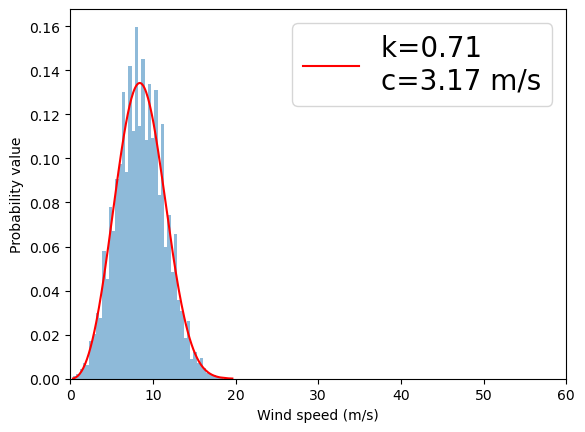

3.832199635930814 0.06598058788986824 8.344921354720407


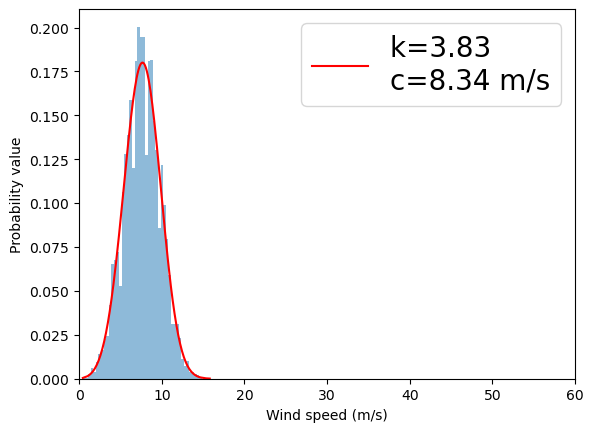

4.265909699941208 0.32643415464417314 6.929059908680632


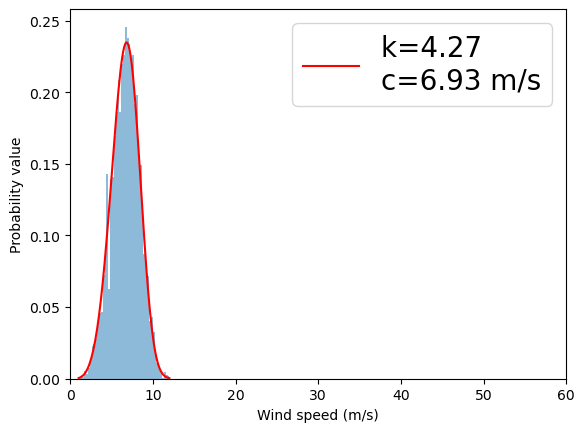

In [35]:
from scipy import stats
import matplotlib.pyplot as plt

for i in DATA:
    
    # Only wind speed data
    data = i['ws_80_ll_1'].sort_values(axis=0, ascending=True)

    # Parameters of Weibull fir
    k, b, c = stats.weibull_min.fit(data) 

    # Plot
    _ = plt.hist(data, bins=np.linspace(data.min(), data.max(), 50), density=True, alpha=0.5); # label='Wind speed probability distribution'
    plt.plot(data, stats.exponweib.pdf(data, *stats.exponweib.fit(data, 1, 1, scale=2, loc=0)), c='r', label='k=%1.2f \nc=%1.2f m/s' %(k, c))
    print(k,b,c)
#     plt.title('Wind speed distribution in Site 1')
    plt.xlabel('Wind speed (m/s)')
    plt.ylabel('Probability value')
    plt.xlim(0,60)
    plt.legend(fontsize=20, loc=1)
    plt.show()

## 4. Wind Rose

## 4.1. Site1 and Site 1

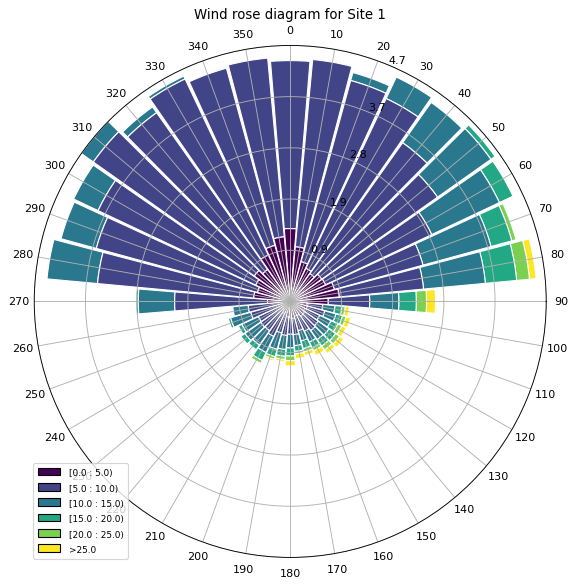

In [63]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df2.wind_direction,
       df2.wind_speed,
       normed=True,
       nsector= 36,opening=0.94, bins=np.arange(0, 30, 5),
       edgecolor='white')
ax.set_legend(loc = 'best')
ax.set_thetagrids(range(0,360,10),[90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 350, 340, 330, 320, 310, 300, 290, 280, 270, 260, 250, 240, 230, 220, 210, 200, 190, 180, 170, 160, 150, 140, 130, 120, 110, 100])
plt.title(f'Wind rose diagram for Site 2')
plt.show()

## 3.1. Power curve for the SWT-2.3-82 wind turbine in Site 1

https://www.mdpi.com/2071-1050/13/5/2444?type=check_update&version=1

https://www.researchgate.net/publication/228904265_Study_of_impacts_of_a_large_penetration_of_wind_power_and_distributed_power_generation_as_a_whole_on_the_Brazilian_power_system/figures?lo=1

https://www.mdpi.com/2071-1050/13/5/2444

https://www.researchgate.net/publication/267087511_Wake_Effects_of_Wind_Turbines_and_Its_Impacts_on_Power_Curve_Measurements/figures?lo=1

https://towardsdatascience.com/wind-energy-physics-and-resource-assessment-with-python-789a0273e697

## 2.1 Site 1 in 

13.575319490710902 2.047838246616486


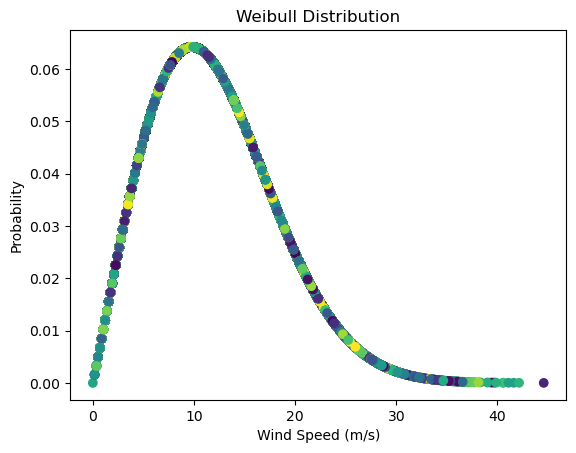

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special as sc

ws = df1['wind_speed_80_logarithmic_law']

def weibull (x,c,k):
    return (k / c) * (x / c)**(k - 1) * np.exp(-(x / c)**k)

k= (math.sqrt(np.mean(abs(ws - np.mean(ws))**2))/np.mean(ws))**-1.089
gamma_f = math.exp(sc.gammaln(1+(1/k)))
c = (np.mean(ws)/gamma_f)

k ,a, c = stats.weibull_min.fit(ws)
Weibull = weibull(ws,c,k)

# (2.047838246616486, -0.01312186340936591, 13.575319490710902)
print(c,k)
Weibull_df = pd.DataFrame(Weibull).rename(columns={"wind_speed_80_logarithmic_law":"Probability"})

N=52560
colors = np.random.rand(N)
plt.scatter(ws,Weibull,c=colors, zorder=1)
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Probability")
plt.title("Weibull Distribution")
plt.show()

In [122]:
stats.weibull_min.fit(ws)


(2.047838246616486, -0.01312186340936591, 13.575319490710902)

In [111]:
params = stats.weibull_min.fit(data, 
                               floc = 0, #Fix the location at zero
                               scale = 2 ) #set 1st scale parameter

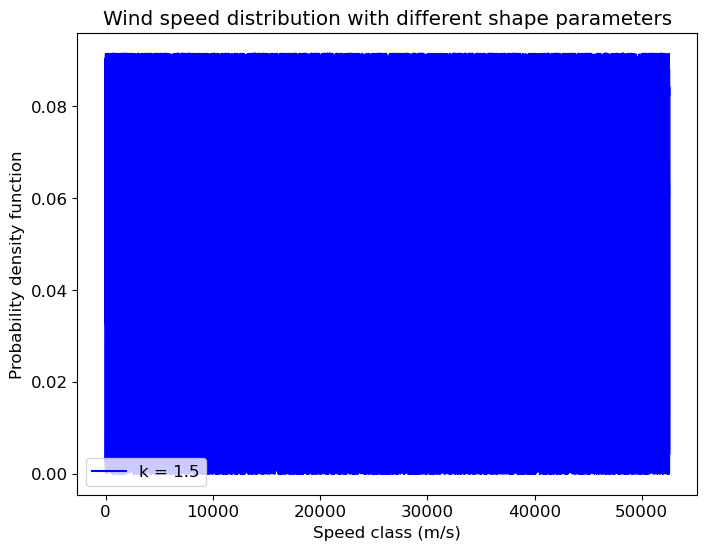

In [114]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (8, 6))
plt.rcParams["font.size"] = 12

speed_range =df2['wind_speed_80_logarithmic_law']

plt.plot(stats.weibull_min.pdf(speed_range, *(1.5, 0, 8.15)),
         color = "blue",
        label = "k = 1.5")

# plt.plot(stats.weibull_min.pdf(speed_range, *params),
#          color = "green",
#         label = "k = 2.23")   #shape factor

# plt.plot(stats.weibull_min.pdf(speed_range, *(3, 0, 8.15)),
#         label = "k = 3",
#         color = "red")

plt.xlabel("Speed class (m/s)")
plt.ylabel("Probability density function")
plt.title("Wind speed distribution with different shape parameters")

plt.legend()

In [105]:
Weibull_df

,Probability
0,0.062076
1,0.052250
2,0.049751
3,0.047848
4,0.064333
...,...
52555,0.048028
52556,0.003163
52557,0.063388
52558,0.058818


<AxesSubplot:xlabel='wind_speed_80_logarithmic_law', ylabel='Count'>

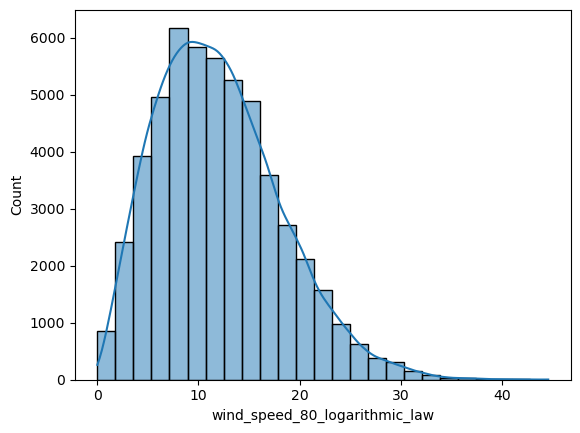

In [68]:
sns.histplot(data = df1, x = df1.wind_speed_80_logarithmic_law, kde = True, bins = 25)

## 2.2. Site 2

<AxesSubplot:xlabel='wind_speed_80_logarithmic_law', ylabel='Count'>

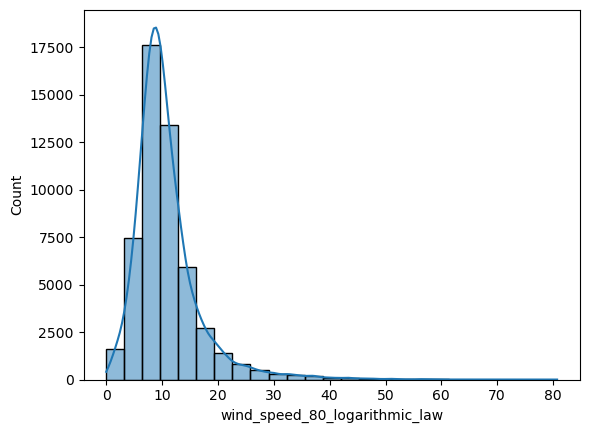

In [69]:
sns.histplot(data = df2, x = df2.wind_speed_80_logarithmic_law, kde = True, bins = 25)

C:\Users\Usser\AppData\Local\Temp\ipykernel_25712\1056036294.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['alpha=0.1'][i] = wind_speed_at_h(5, h0, i, 0.1)
C:\Users\Usser\AppData\Local\Temp\ipykernel_25712\2765801552.py:8: RuntimeWarning: divide by zero encountered in log
  wind_speed = ((ln(h/z))/(ln(h0/z)))*wind_speed_0
C:\Users\Usser\AppData\Local\Temp\ipykernel_25712\1056036294.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['alpha=0.15'][i] = wind_speed_at_h_logarithmic_law(5, h0, i, 0.0002)
C:\Users\Usser\AppData\Local\Temp\ipykernel_25712\1056036294.py:16: SettingWithCopyWarning: 
A v

[]

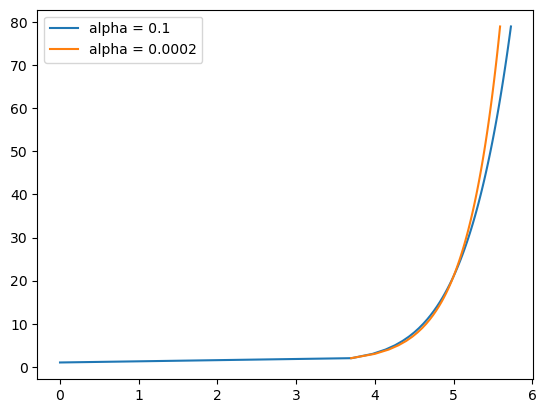

In [55]:
h0 = 20 # wind speeds at 20 m height measured 
alpha = 0.1 # Friction Coefficient 

var1  = np.arange(start=1, stop=80, step=1).reshape(-1)
dataset = pd.DataFrame()
dataset['highs'] = var1


dataset['alpha=0.1'] = np.nan
dataset['alpha=0.15'] = np.nan
dataset['alpha=0.3'] = np.nan

for i in range(0,len(dataset['highs'])):
    dataset['alpha=0.1'][i] = wind_speed_at_h(5, h0, i, 0.1)
    dataset['alpha=0.15'][i] = wind_speed_at_h_logarithmic_law(5, h0, i, 0.0002)
    dataset['alpha=0.3'][i] = wind_speed_at_h(5, h0, i, 0.3)

plt.plot(dataset['alpha=0.1'], dataset['highs'], label = 'alpha = 0.1')
plt.plot(dataset['alpha=0.15'], dataset['highs'], label = 'alpha = 0.0002')
# plt.plot(dataset['alpha=0.3'], dataset['highs'], label = 'alpha = 0.3')
plt.legend()
plt.plot()

In [34]:
highs = np.array(0,)
highs

TypeError: Cannot interpret '80' as a data type